In [213]:
import joblib
import kagglehub
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import root_mean_squared_error,r2_score


# Download data

In [214]:

path = kagglehub.dataset_download("anassarfraz13/student-success-factors-and-insights")

print("Dataset path:", path)

for file_name in os.listdir(path):
    if file_name.endswith(".csv"):
        csv_path = os.path.join(path, file_name)
        break


Dataset path: C:\Users\User.DESKTOP-OQ6NE4T\.cache\kagglehub\datasets\anassarfraz13\student-success-factors-and-insights\versions\1


In [215]:
file=pd.read_csv(csv_path)

In [216]:
file

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


# Show data info

In [217]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

# Summary Statistics

In [218]:
file.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


# Check Outliers

In [219]:
string_cols = file.select_dtypes(include='object').columns

for col in string_cols:
    file[col] = file[col].astype(str)

In [220]:
list_1=file[['Hours_Studied','Attendance','Sleep_Hours','Previous_Scores','Tutoring_Sessions','Physical_Activity','Exam_Score']]

outlier_counts = {}

for col in list_1.columns:
    Q1 = list_1[col].quantile(0.25)
    Q3 = list_1[col].quantile(0.75)
    IQR = Q3 - Q1

    outliers = list_1[(list_1[col] < Q1 - 1.5*IQR) | (list_1[col] > Q3 + 1.5*IQR)]
    outlier_counts[col] = outliers.shape[0]


outlier_df = pd.DataFrame(list(outlier_counts.items()), columns=['Column', 'Outlier_Count'])
print(outlier_df)


              Column  Outlier_Count
0      Hours_Studied             43
1         Attendance              0
2        Sleep_Hours              0
3    Previous_Scores              0
4  Tutoring_Sessions            430
5  Physical_Activity              0
6         Exam_Score            104


# Deal with Outliers

In [221]:
for col in ['Hours_Studied','Attendance','Sleep_Hours','Previous_Scores','Tutoring_Sessions','Physical_Activity','Exam_Score']:
    Q1 = file[col].quantile(0.25)
    Q3 = file[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    file[col] = file[col].apply(lambda x: upper if x > upper else (lower if x < lower else x))




# Check Null Values

In [222]:
print(file.isnull().sum())

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64


# Check Duplicated Values

In [223]:
file.duplicated().sum()

0

# Collect object items

In [224]:
list_objects=[]
for i in file:
    if file[i].dtype not in ['int64','float64']:
        list_objects.append(i)

In [225]:
list_objects=pd.DataFrame(list_objects)
list_objects

,0
0,Parental_Involvement
1,Access_to_Resources
2,Extracurricular_Activities
3,Motivation_Level
4,Internet_Access
5,Family_Income
6,Teacher_Quality
7,School_Type
8,Peer_Influence
9,Learning_Disabilities


## -------------------------------------------------**EDR**---------------------------------------------------------
## --------------------------------**Questions to answer with analysis**----------------------------------------
## -----------------------------------------**First type of analysis**----------------------------------------------
# -----------------------------------Descriptive Analysis----------------------------------------
##


# What is the average number of study hours among students?

In [226]:
file['Hours_Studied'].mean()

19.97184803995762

# What is the average attendance rate in the dataset?


In [227]:
file['Attendance'].mean()

79.97744816104132

# What is the distribution of exam scores among students (low, average, or high achievers)?


In [228]:
file['Exam_Score'].std()

3.372907772062794

# Calculate (Coefficient of Variation - CV):


In [229]:
cv=(file['Exam_Score'].std()/file['Exam_Score'].mean())*100
cv

5.024656016003932

In [230]:
# >>std=3.890455781261732 and cv=5.786298268628189
# >> distribution of exam scores among students is average

# What percentage of students receive tutoring sessions?


In [231]:
(file['Tutoring_Sessions'].value_counts()/len(file))*100

Tutoring_Sessions
1.0    32.980173
2.0    24.958377
0.0    22.899955
3.0    12.653247
3.5     6.508249
Name: count, dtype: float64

# Is there a noticeable difference in sleep hours between male and female students? 


In [232]:
sleep_hours_with_gender=file.groupby('Gender')['Sleep_Hours'].describe()
print(sleep_hours_with_gender)
# no

         count      mean       std  min  25%  50%  75%   max
Gender                                                      
Female  2793.0  7.041890  1.458610  4.0  6.0  7.0  8.0  10.0
Male    3814.0  7.019664  1.475166  4.0  6.0  7.0  8.0  10.0


C:\Users\User.DESKTOP-OQ6NE4T\AppData\Local\Temp\ipykernel_6088\1748836833.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=file,x='Gender',y='Sleep_Hours',palette='Set2')


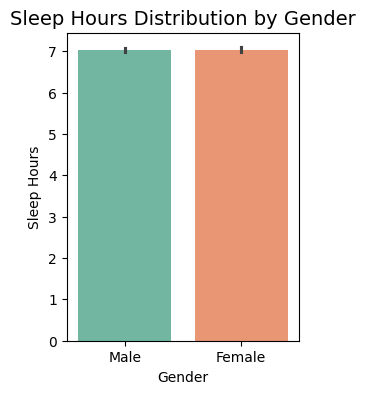

In [233]:
plt.figure(figsize=(3,4))
sns.barplot(data=file,x='Gender',y='Sleep_Hours',palette='Set2')
plt.xlabel("Gender")
plt.ylabel("Sleep Hours")
plt.title("Sleep Hours Distribution by Gender", fontsize=14)
plt.show()

C:\Users\User.DESKTOP-OQ6NE4T\AppData\Local\Temp\ipykernel_6088\1748836833.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=file,x='Gender',y='Sleep_Hours',palette='Set2')


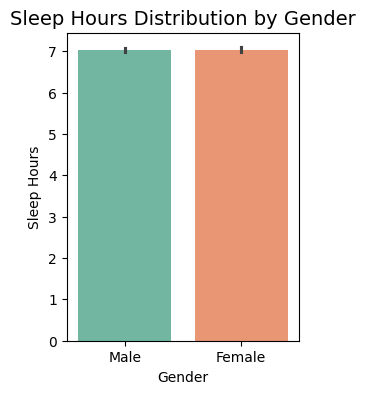

In [234]:
plt.figure(figsize=(3,4))
sns.barplot(data=file,x='Gender',y='Sleep_Hours',palette='Set2')
plt.xlabel("Gender")
plt.ylabel("Sleep Hours")
plt.title("Sleep Hours Distribution by Gender", fontsize=14)
plt.show()

# Which school type (public or private) is most common among students?


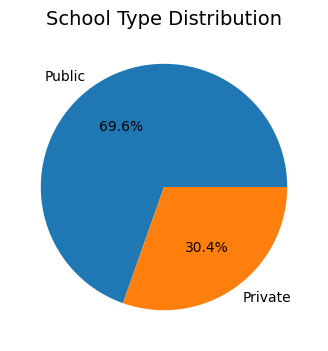

In [235]:
School_type=file['School_Type'].value_counts()
plt.figure(figsize=(4,4))
plt.pie(x=School_type.values,labels=School_type.index,autopct='%1.1f%%')
plt.title("School Type Distribution", fontsize=14)
plt.show()

## ------------------------------------------**Second type of analysis**------------------------------------------
# --------------------------------------Correlation Analysis-------------------------------------
## 

# Is there a strong relationship between study hours and exam scores?


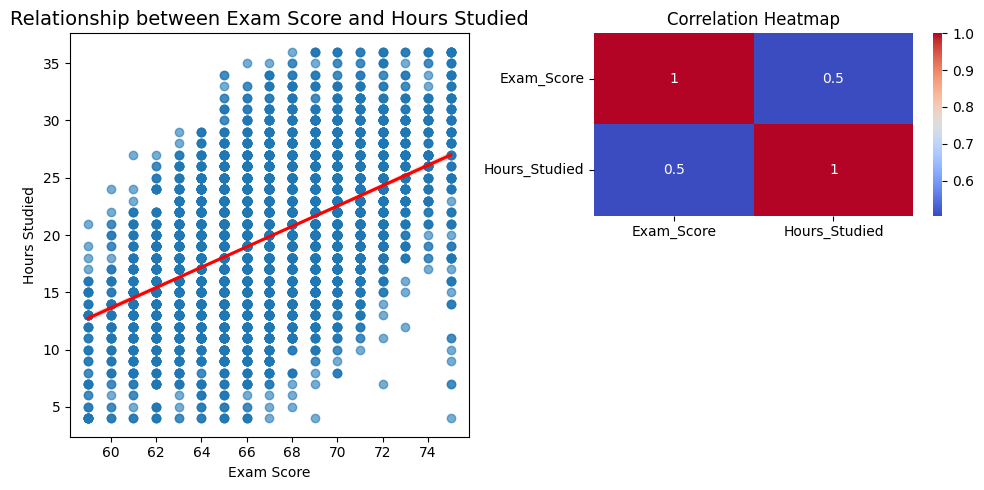

In [236]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
#sns.scatterplot(data=file,x='Exam_Score',y='Hours_Studied', palette='Set2',sc)
sns.regplot(data=file,x='Exam_Score',y='Hours_Studied',scatter_kws={'alpha':0.6},line_kws={'color':'red'})
plt.title("Relationship between Exam Score and Hours Studied", fontsize=14)
plt.xlabel("Exam Score")
plt.ylabel("Hours Studied")

plt.subplot(2,2,2)
corr=file[['Exam_Score','Hours_Studied']].corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title("Correlation Heatmap")

plt.tight_layout()
plt.show()

#  Does attendance rate affect academic performance?


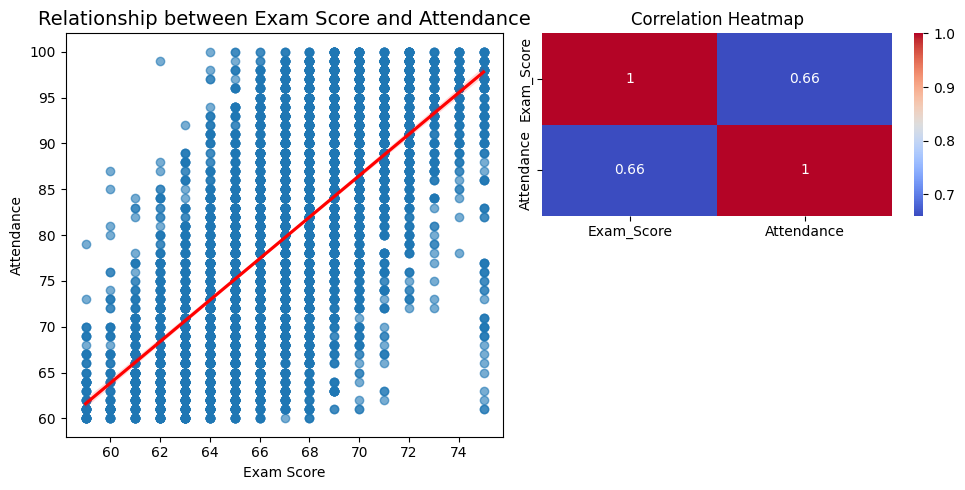

In [237]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.regplot(data=file,x='Exam_Score',y='Attendance',scatter_kws={'alpha':0.6},line_kws={'color':'red'})
plt.title("Relationship between Exam Score and Attendance", fontsize=14)
plt.xlabel("Exam Score")
plt.ylabel("Attendance")

plt.subplot(2,2,2)
corr=file[['Exam_Score','Attendance']].corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title("Correlation Heatmap")

plt.tight_layout()
plt.show()

# What is the effect of previous scores on current exam results?


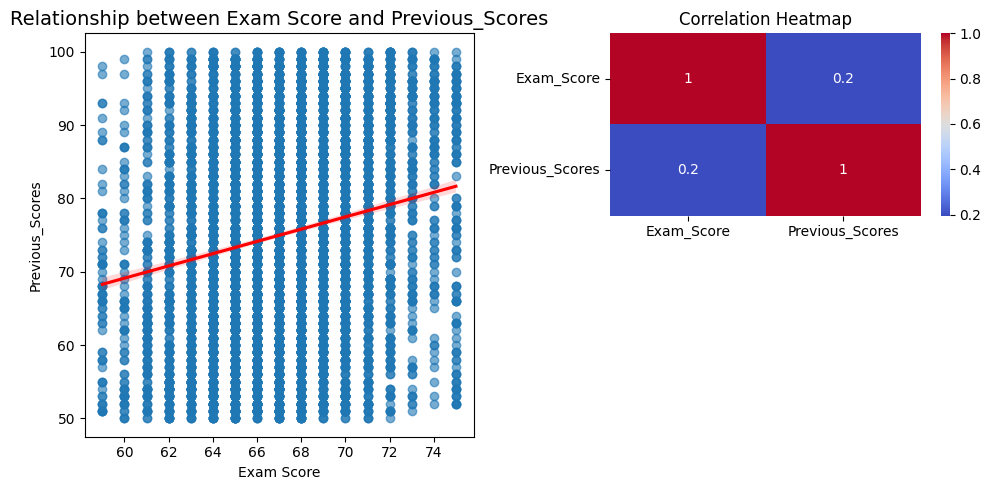

In [238]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.regplot(data=file,x='Exam_Score',y='Previous_Scores',scatter_kws={'alpha':0.6},line_kws={'color':'red'})
plt.title("Relationship between Exam Score and Previous_Scores", fontsize=14)
plt.xlabel("Exam Score")
plt.ylabel("Previous_Scores")

plt.subplot(2,2,2)
corr=file[['Exam_Score','Previous_Scores']].corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title("Correlation Heatmap")

plt.tight_layout()
plt.show()

# Do students who sleep 7–8 hours achieve higher scores?


C:\Users\User.DESKTOP-OQ6NE4T\AppData\Local\Temp\ipykernel_6088\2521897405.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sleepH_score,x='Sleep_Hours',y='Exam_Score',palette='coolwarm')


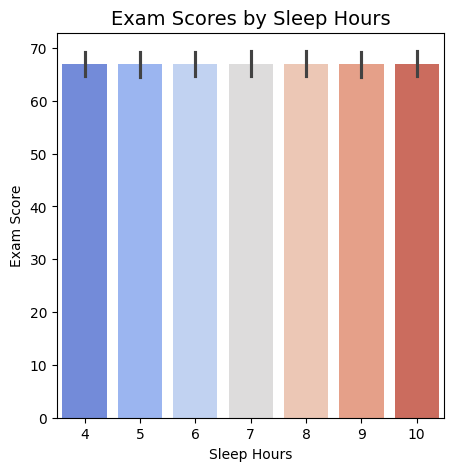

In [239]:
sleepH_score=file.groupby('Sleep_Hours')['Exam_Score'].value_counts().reset_index(name='count')
plt.figure(figsize=(5,5))
sns.barplot(data=sleepH_score,x='Sleep_Hours',y='Exam_Score',palette='coolwarm')
plt.title("Exam Scores by Sleep Hours", fontsize=14)
plt.xlabel("Sleep Hours")
plt.ylabel("Exam Score")
plt.show()


# Does having internet access at home influence academic achievement?
# What is the relationship between extracurricular activities and students’ exam scores?

C:\Users\User.DESKTOP-OQ6NE4T\AppData\Local\Temp\ipykernel_6088\489339758.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=file,x='Internet_Access',y='Exam_Score',palette='coolwarm')
C:\Users\User.DESKTOP-OQ6NE4T\AppData\Local\Temp\ipykernel_6088\489339758.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=file,x='Extracurricular_Activities',y='Exam_Score',palette='coolwarm')


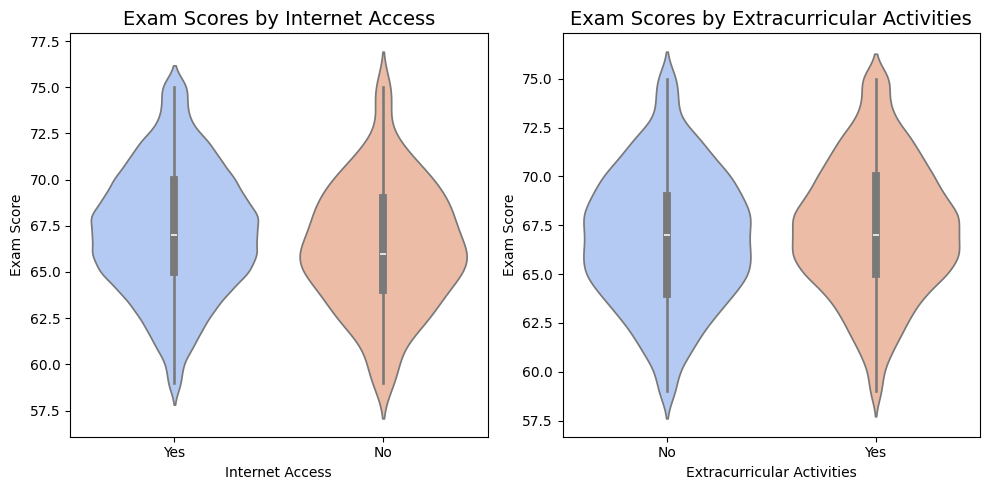

In [240]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.violinplot(data=file,x='Internet_Access',y='Exam_Score',palette='coolwarm')
plt.title("Exam Scores by Internet Access", fontsize=14)
plt.xlabel("Internet Access")
plt.ylabel("Exam Score")

plt.subplot(1,2,2)
sns.violinplot(data=file,x='Extracurricular_Activities',y='Exam_Score',palette='coolwarm')
plt.title("Exam Scores by Extracurricular Activities", fontsize=14)
plt.xlabel("Extracurricular Activities")
plt.ylabel("Exam Score")

plt.tight_layout()
plt.show()

# Is motivation level positively correlated with exam performance?
# What is the relationship between family income and academic achievement?

C:\Users\User.DESKTOP-OQ6NE4T\AppData\Local\Temp\ipykernel_6088\2940128523.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=file,x='Motivation_Level',y='Exam_Score',palette='coolwarm')
C:\Users\User.DESKTOP-OQ6NE4T\AppData\Local\Temp\ipykernel_6088\2940128523.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=file,x='Family_Income',y='Exam_Score',palette='coolwarm')


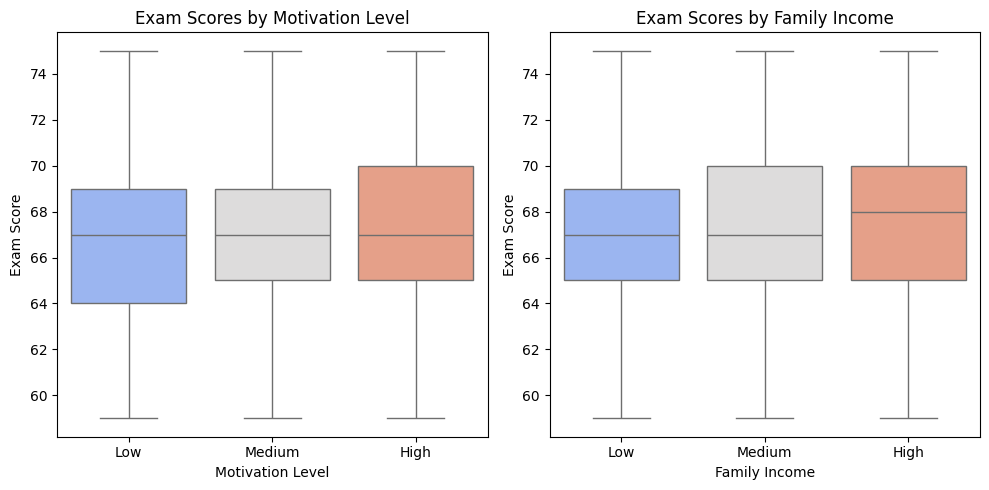

In [241]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(data=file,x='Motivation_Level',y='Exam_Score',palette='coolwarm')
plt.title("Exam Scores by Motivation Level")
plt.xlabel("Motivation Level")
plt.ylabel("Exam Score")

plt.subplot(1,2,2)
sns.boxplot(data=file,x='Family_Income',y='Exam_Score',palette='coolwarm')
plt.title("Exam Scores by Family Income")
plt.xlabel("Family Income")
plt.ylabel("Exam Score")
plt.tight_layout()
plt.show()

# -----------------------------------(Comparative Analysis)------------------------------------
##

# Do exam scores differ between male and female students?

In [242]:
gender_scores = file.groupby('Gender')['Exam_Score'].mean().reset_index()

# Do public school students perform differently from private school students?

In [243]:
School_type_with_score=file.groupby('School_Type')['Exam_Score'].mean().reset_index()
School_type_with_score

,School_Type,Exam_Score
0,Private,67.189647
1,Public,67.099826


# Do students with learning disabilities achieve lower scores?

In [244]:
Learning_Disabilities_with_score=file.groupby('Learning_Disabilities')['Exam_Score'].mean().reset_index()
Learning_Disabilities_with_score

,Learning_Disabilities,Exam_Score
0,No,67.242219
1,Yes,66.148201


C:\Users\User.DESKTOP-OQ6NE4T\AppData\Local\Temp\ipykernel_6088\1403153411.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=School_type_with_score,x='School_Type',y='Exam_Score',palette='coolwarm')
C:\Users\User.DESKTOP-OQ6NE4T\AppData\Local\Temp\ipykernel_6088\1403153411.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Learning_Disabilities_with_score,x='Learning_Disabilities',y='Exam_Score',palette='coolwarm')
C:\Users\User.DESKTOP-OQ6NE4T\AppData\Local\Temp\ipykernel_6088\1403153411.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



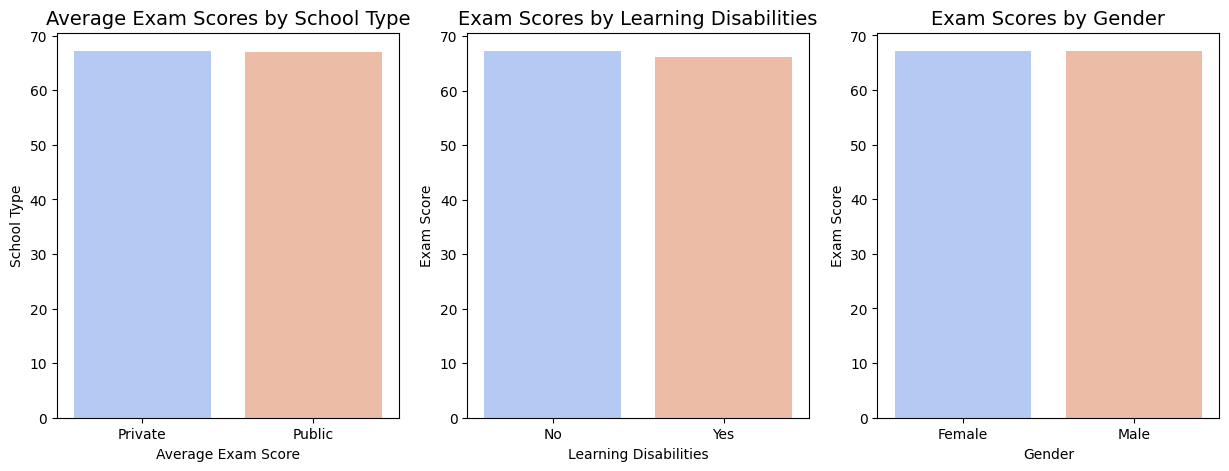

In [245]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.barplot(data=School_type_with_score,x='School_Type',y='Exam_Score',palette='coolwarm')
plt.title("Average Exam Scores by School Type", fontsize=14)
plt.xlabel("Average Exam Score")
plt.ylabel("School Type")


plt.subplot(1,3,2)
sns.barplot(data=Learning_Disabilities_with_score,x='Learning_Disabilities',y='Exam_Score',palette='coolwarm')
plt.title("Exam Scores by Learning Disabilities", fontsize=14)
plt.xlabel("Learning Disabilities")
plt.ylabel("Exam Score")

plt.subplot(1,3,3)
sns.barplot(data=gender_scores,x='Gender',y='Exam_Score',palette='coolwarm')
plt.title("Exam Scores by Gender", fontsize=14)
plt.xlabel("Gender")
plt.ylabel("Exam Score")


plt.show()

# Is there a difference in academic performance based on distance from home?


In [246]:
Distance_from_Home_with_score=file.groupby('Distance_from_Home')['Exam_Score'].mean().reset_index()
file = file[file['Distance_from_Home'].apply(lambda x: isinstance(x, str))]
Distance_from_Home_with_score


,Distance_from_Home,Exam_Score
0,Far,66.331307
1,Moderate,66.887387
2,Near,67.397271
3,nan,66.432836


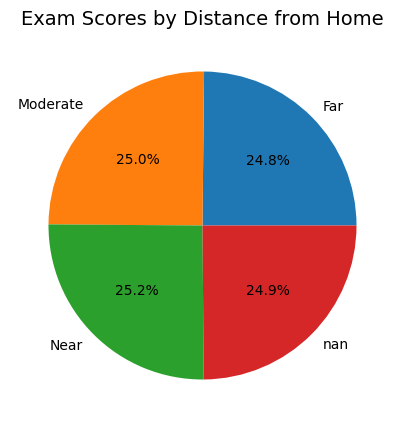

In [247]:
plt.figure(figsize=(5,5))
plt.pie(Distance_from_Home_with_score['Exam_Score'],labels=Distance_from_Home_with_score['Distance_from_Home'],autopct='%1.1f%%')
plt.title("Exam Scores by Distance from Home", fontsize=14)
plt.show()


## --------------------------------------------*End of EDA*-------------------------------------------------------

# --------------------------------**Predictive Analysis**------------------------------------------
## --------------------------------Using Machine Learning Models--------------------------------------------
##
#

In this section, we move from data exploration to predictive modeling.  
We will apply machine learning algorithms to predict the target variable and evaluate their performance.

##
##


## -----------------------------------------**Encoding Some Features**-----------------------------------------
##
##

## 1- Use Binary Ecoding

In [248]:
binary_encoding_list=['Extracurricular_Activities','Internet_Access','School_Type','Peer_Influence','Learning_Disabilities','Gender']
for col in binary_encoding_list:
    encoder=ce.BinaryEncoder(cols=[col])
    file=encoder.fit_transform(file)

## 1- Use Label Ecoding

In [249]:
label_encoding_list=['Parental_Involvement','Access_to_Resources','Motivation_Level','Family_Income','Teacher_Quality']
l_encoder=LabelEncoder()
for col in label_encoding_list:
    file[col]=l_encoder.fit_transform(file[col])
    
    

## 1- Use OneHotEcoding

In [250]:
one_encoder=OneHotEncoder()
one_hot_encoding_list=['Parental_Education_Level','Distance_from_Home']
for col in one_hot_encoding_list:
    one_encoded_data=one_encoder.fit_transform(file[[col]])
    one_encoded_df=pd.DataFrame(one_encoded_data.toarray(),columns=one_encoder.get_feature_names_out([col]))
    file=pd.concat([file,one_encoded_df],axis=1)
    
file.drop(labels=['Parental_Education_Level','Distance_from_Home'],axis=1,inplace=True)    


In [251]:
file

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities_0,Extracurricular_Activities_1,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access_0,...,Gender_1,Exam_Score,Parental_Education_Level_College,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Parental_Education_Level_nan,Distance_from_Home_Far,Distance_from_Home_Moderate,Distance_from_Home_Near,Distance_from_Home_nan
0,23.0,84,1,0,0,1,7,73,1,0,...,1,67.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,19.0,64,1,2,0,1,8,59,1,0,...,0,61.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,24.0,98,2,2,1,0,7,91,2,0,...,1,74.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,29.0,89,1,2,1,0,8,98,2,0,...,1,71.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,19.0,92,2,2,1,0,6,65,2,0,...,0,70.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25.0,69,0,2,0,1,7,76,2,0,...,0,68.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6603,23.0,76,0,2,0,1,8,81,2,0,...,0,69.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6604,20.0,90,2,1,1,0,6,65,1,0,...,0,68.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6605,10.0,86,0,0,1,0,6,91,0,0,...,0,68.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


# Define Features And Labels

In [252]:
label=file['Exam_Score']
features=file.drop(labels='Exam_Score',axis=1)

# Split Data

In [253]:
x_train,x_test,y_train,y_test=train_test_split(features,label,test_size=.2,random_state=42)

## -----------------------------------------**Scaling Some Features**-----------------------------------------


##  Use StanderScaler

In [254]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

## --------------------------------------**Use Machine Learning Model**--------------------------------------
##


# Ude GradientBoostingRegressor Model

In [255]:
model_1=GradientBoostingRegressor(n_estimators=300)
model_1.fit(x_train,y_train)


GradientBoostingRegressor(n_estimators=300)

## Model Evaluation (R² & RMSE)


In [256]:
model_1_pre=model_1.predict(x_test)
model_1_r2=r2_score(y_test,model_1_pre)
model_1_rmse=root_mean_squared_error(y_test,model_1_pre)
print("RMSE: ",model_1_rmse)
print("R2: ",model_1_r2)

RMSE:  0.8859665437922583
R2:  0.9303709059055609


## Model Performance Evaluation (Train vs Test)
### Metrics: RMSE and R²

In [257]:
y_train_pred = model_1.predict(x_train)

rmse_train = np.sqrt(root_mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)

rmse_test = np.sqrt(root_mean_squared_error(y_test, model_1_pre))
r2_test = r2_score(y_test, model_1_pre)

print(f"Train RMSE: {rmse_train:.3f}, Test RMSE: {rmse_test:.3f}")
print(f"Train R2: {r2_train:.3f}, Test R2: {r2_test:.3f}")


Train RMSE: 0.877, Test RMSE: 0.941
Train R2: 0.948, Test R2: 0.930


## Actual vs Predicted Exam Scores
### Scatter Plot to Visualize Model Prediction Accuracy


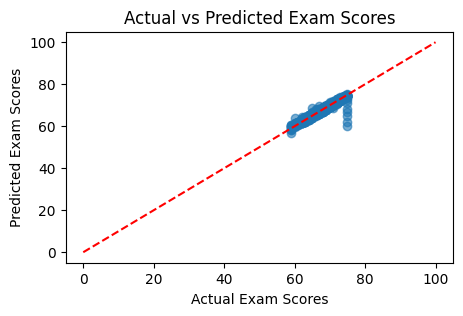

In [258]:
plt.figure(figsize=(5,3))
plt.scatter(y_test, model_1_pre, alpha=0.6)
plt.plot([0, 100], [0, 100], color='red', linestyle='--')
plt.xlabel("Actual Exam Scores")
plt.ylabel("Predicted Exam Scores")
plt.title("Actual vs Predicted Exam Scores")
plt.show()

## Save the Cleaned Dataset
### Export the processed data to a CSV file


In [259]:
file.to_csv('exam_score_dataset_clean.csv', index=False)


## Save and Load the Trained Model
### Using Joblib for Model Serialization


In [260]:
joblib.dump(model_1, 'exam_score_model.pkl')

# model_loaded = joblib.load('exam_score_model.pkl')


['exam_score_model.pkl']